#### Battery Remaining Useful Life

#### Attribute information

https://www.kaggle.com/datasets/ignaciovinuales/battery-remaining-useful-life-rul

##### Loading the dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from fancyimpute import IterativeImputer
import regex as re

##### Loading the dataset

In [2]:
data = pd.read_csv("Battery_RUL.csv")
data.head()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cycle_Index,15064.0,556.155005,322.378480,1.000,271.000000,560.000000,833.0000,1134.000
Discharge Time (s),15064.0,4581.273960,33144.012077,8.690,1169.310000,1557.250000,1908.0000,958320.370
Decrement 3.6-3.4V (s),15064.0,1239.784672,15039.589269,-397645.908,319.600000,439.239471,600.0000,406703.768
Max. Voltage Dischar. (V),15064.0,3.908176,0.091003,3.043,3.846000,3.906000,3.9720,4.363
Min. Voltage Charg. (V),15064.0,3.577904,0.123695,3.022,3.488000,3.574000,3.6630,4.379
Time at 4.15V (s),15064.0,3768.336171,9129.552477,-113.584,1828.884179,2930.203500,4088.3265,245101.117
Time constant current (s),15064.0,5461.266970,25155.845202,5.980,2564.310000,3824.260000,5012.3500,880728.100
Charging time (s),15064.0,10066.496204,26415.354121,5.980,7841.922500,8320.415000,8763.2825,880728.100
RUL,15064.0,554.194172,322.434514,0.000,277.000000,551.000000,839.0000,1133.000


In [5]:
data.shape

(15064, 9)

##### Checking null values

In [6]:
data.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

###### Dataset is free of null values.

##### Treating Outliers

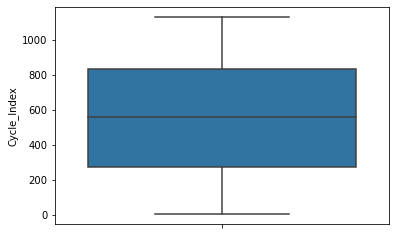

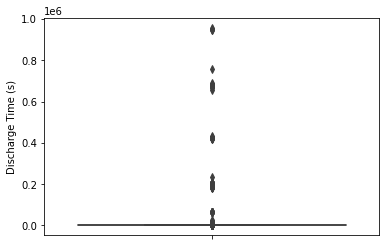

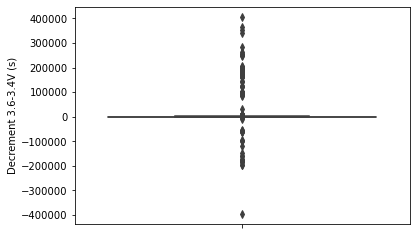

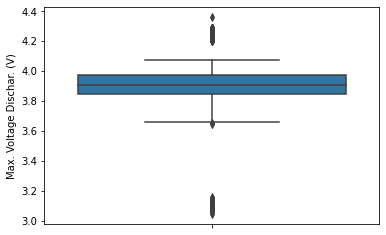

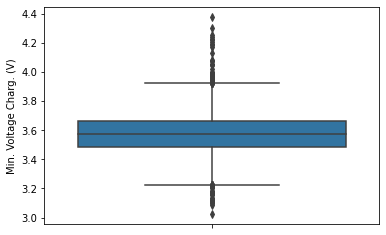

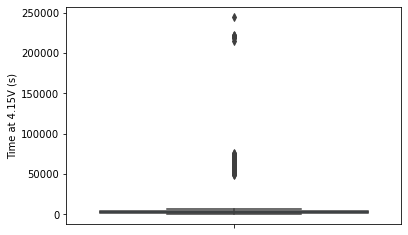

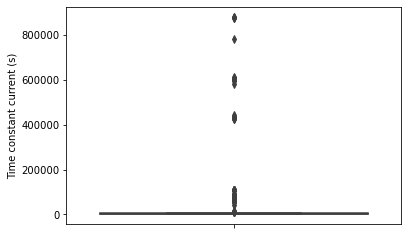

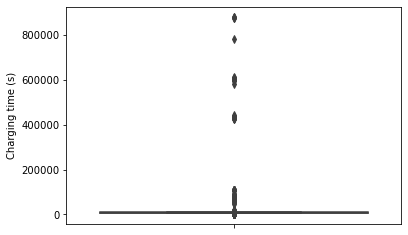

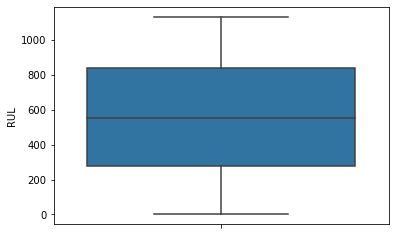

In [7]:
for i in data.columns:
    sns.boxplot(y=data[i])
    plt.show();

##### Setting the outlier limits

In [8]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3- Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL, LL

In [9]:
for i in data.columns:
    UL,LL = outlier_limit(data[i])
    data[i] = np.where((data[i]>UL)|(data[i]<LL), np.nan, data[i])

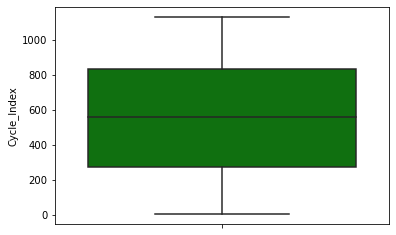

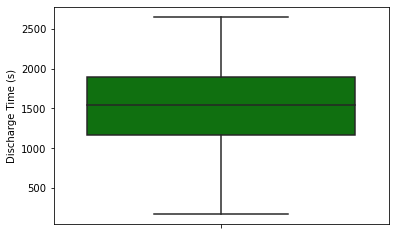

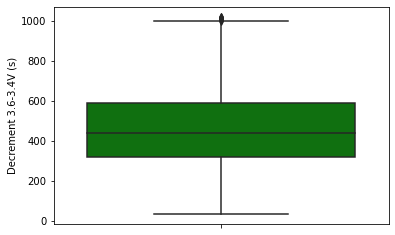

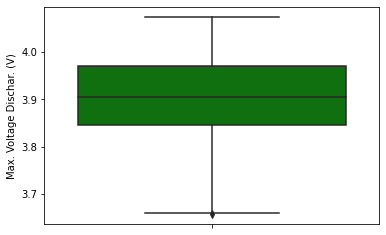

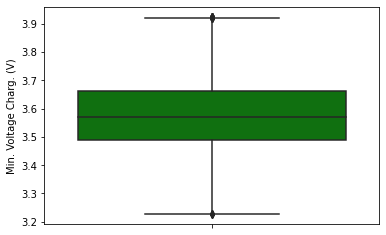

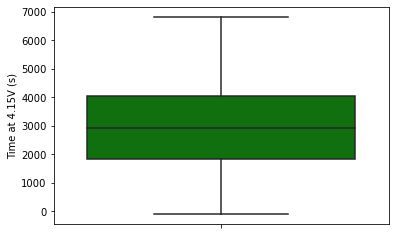

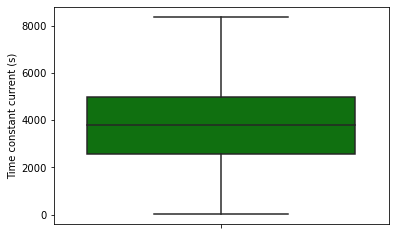

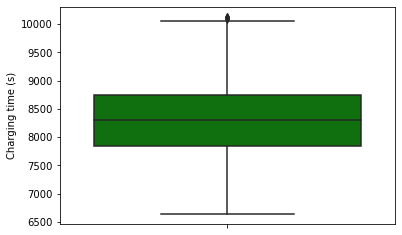

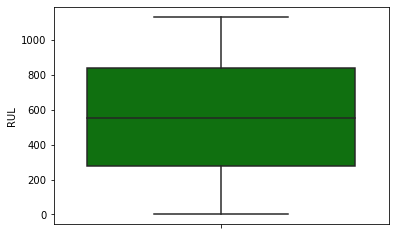

In [10]:
for i in data.columns:
    sns.boxplot(y=data[i], color="green")
    plt.show();

#### We have treated the outliers. Lets remove the null values.

In [11]:
data.dropna(inplace=True)

In [12]:
data.shape

(14445, 9)

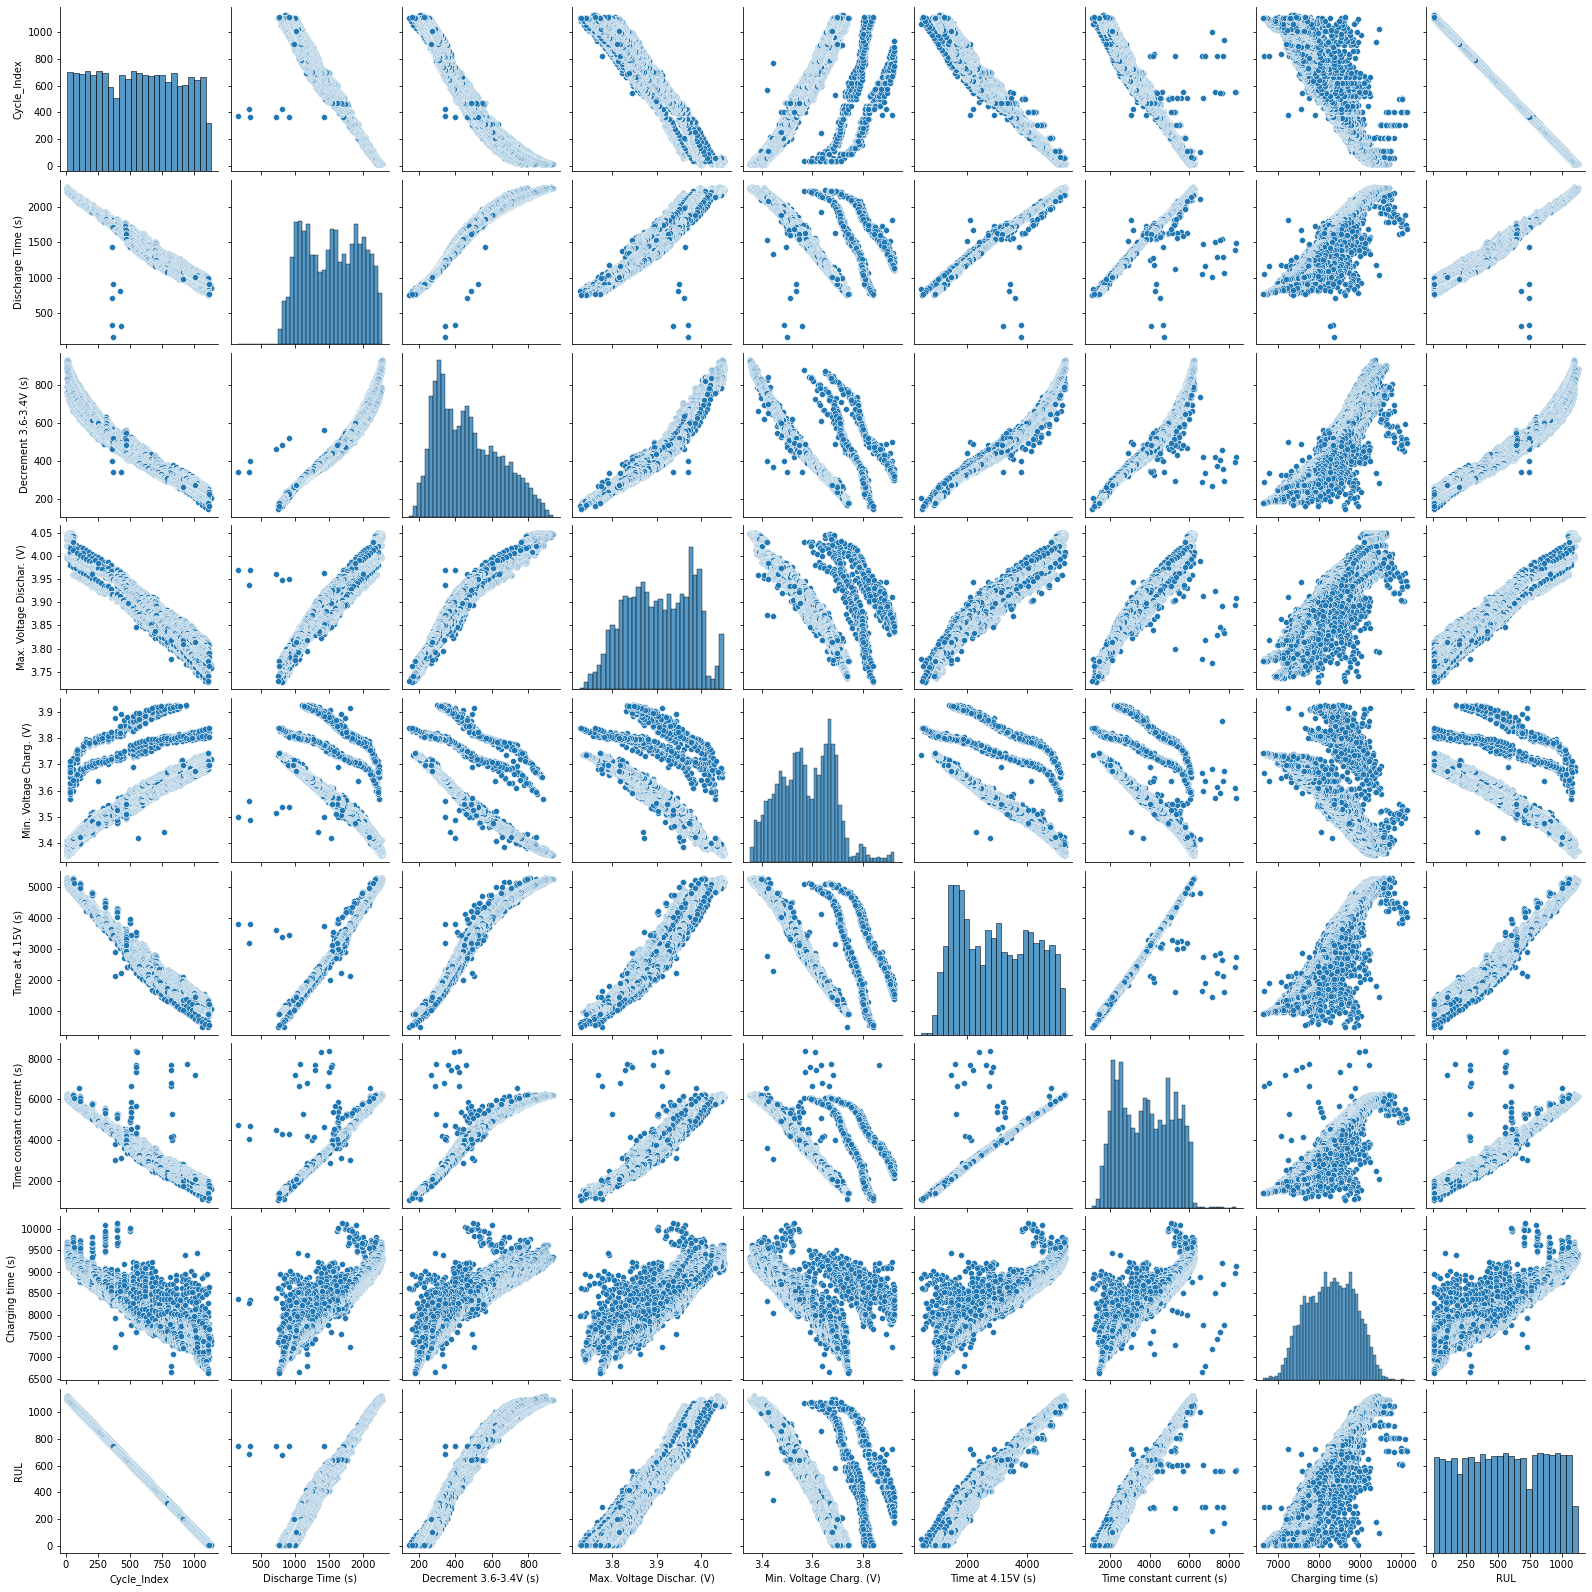

In [13]:
sns.pairplot(data);

##### Correlation matrix

<AxesSubplot:>

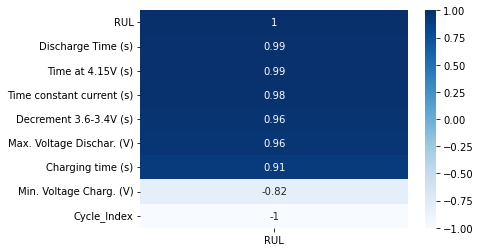

In [14]:
sns.heatmap(data.corr()[["RUL"]].sort_values(by="RUL", ascending=False), vmin=-1, vmax=1,annot=True, cmap="Blues")

#### We can see that except "Cycle_Index" & 'Min. Voltage Charg. (V)' all other features are highly correlated with RUL.

In [15]:
##### feature selection

In [16]:
x = data[['Discharge Time (s)', 'Decrement 3.6-3.4V (s)','Max. Voltage Dischar. (V)','Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)']].values

In [17]:
x.shape

(14445, 6)

In [18]:
y = data["RUL"].values

In [19]:
y.shape

(14445,)

##### Scaling the data

In [20]:
sc = StandardScaler()

In [21]:
x = sc.fit_transform(x)

##### Splitting the data into training and testing data

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
#### Model building

In [24]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0),
}

In [25]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  97.7676191647425
training_score:  97.83513827073446
testing_score:  97.7676191647425
mae:  35.52103002645083
mse:  2226.0716747823526
rmse_test:  47.181264022727845
****************************************************************************************************
model trained with Ridge
r2score:  97.76832485346077
training_score:  97.8351176544507
testing_score:  97.76832485346077
mae:  35.52637929155301
mse:  2225.3679804833573
rmse_test:  47.173806084344704
****************************************************************************************************
model trained with LinearSVR
r2score:  97.73088504380885
training_score:  97.76790561358334
testing_score:  97.73088504380885
mae:  35.50956188279153
mse:  2262.701977648643
rmse_test:  47.56786707062493
****************************************************************************************************
model trained with DecisionTreeRegressor
r2score:  99.22115569911736
training_sco

#### We can see that RandomForestRegressor is having the best metrics. Lets proceed with it.

#### Since the accuracy is 99% no need for Hyperparameter tuning

In [26]:
rfr = RandomForestRegressor(random_state=0)

In [27]:
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [28]:
y_pred = rfr.predict(x)

###### Making and saving the prediction in a dataframe

In [29]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"))

In [30]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,1095.0,1093.35
1,1094.0,1093.19
2,1093.0,1091.87
3,1092.0,1091.55
4,1091.0,1090.69


##### Visualizing the prediction

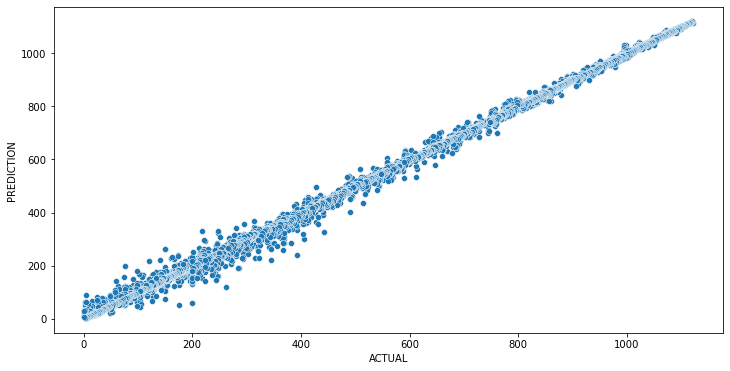

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");